In [1]:
!pip install dipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 4.0.2
    Uninstalling nibabel-4.0.2:
      Successfully uninstalled nibabel-4.0.2


In [2]:
from google.colab import drive
mount_path = '/content/drive'
test_data = mount_path+'/MyDrive/dti-transformer/dti_data'
drive.mount(mount_path)

Mounted at /content/drive


In [3]:
# Daniel Bandala @ nov-2022
# general libraries
import os, glob
import numpy as np
import matplotlib.pyplot as plt
# diffussion image processing
from dipy.io.image import load_nifti, save_nifti
from dipy.reconst.dti import color_fa, decompose_tensor

In [4]:
# set plot parameters
plt.rcParams.update({'font.size': 22})

In [5]:
# folders dataset
main_dir = '/content/drive/MyDrive/dti-transformer/dti_data/INUTR' #ADNI, HCP

In [ ]:
i = 2
# read difussion data
fa, _ = load_nifti(main_dir+'/case_0'+str(i)+'/output/DTI_FA.nii.gz')
v1, _ = load_nifti(main_dir+'/case_0'+str(i)+'/dti/DTI_V1.nii.gz')
v2, _ = load_nifti(main_dir+'/case_0'+str(i)+'/dti/DTI_V2.nii.gz')
v3, _ = load_nifti(main_dir+'/case_0'+str(i)+'/dti/DTI_V3.nii.gz')
tensor, _ = load_nifti(main_dir+'/case_0'+str(i)+'/dti/DTI_tensor.nii.gz')

In [ ]:
v1.shape

(256, 256, 80, 3)

In [ ]:
# reconstruct eigen vectors from diffusion tensor
#eigvals, eigvecs = decompose_tensor(x.view(140,140,96,3,3), min_diffusivity=0)

In [ ]:
# reconstruct eigen vectors from individual vectors
v1_e = np.expand_dims(v1,-1)
v2_e = np.expand_dims(v2,-1)
v3_e = np.expand_dims(v3,-1)
eigvecs = np.concatenate((v1_e,v2_e,v3_e), axis=-1)
eigvecs.shape

(256, 256, 80, 3, 3)

In [ ]:
v1_e.shape

(256, 256, 80, 3, 1)

In [ ]:
rgb_map = color_fa(fa, eigvecs)
rgb_map.shape

(140, 140, 96, 3)

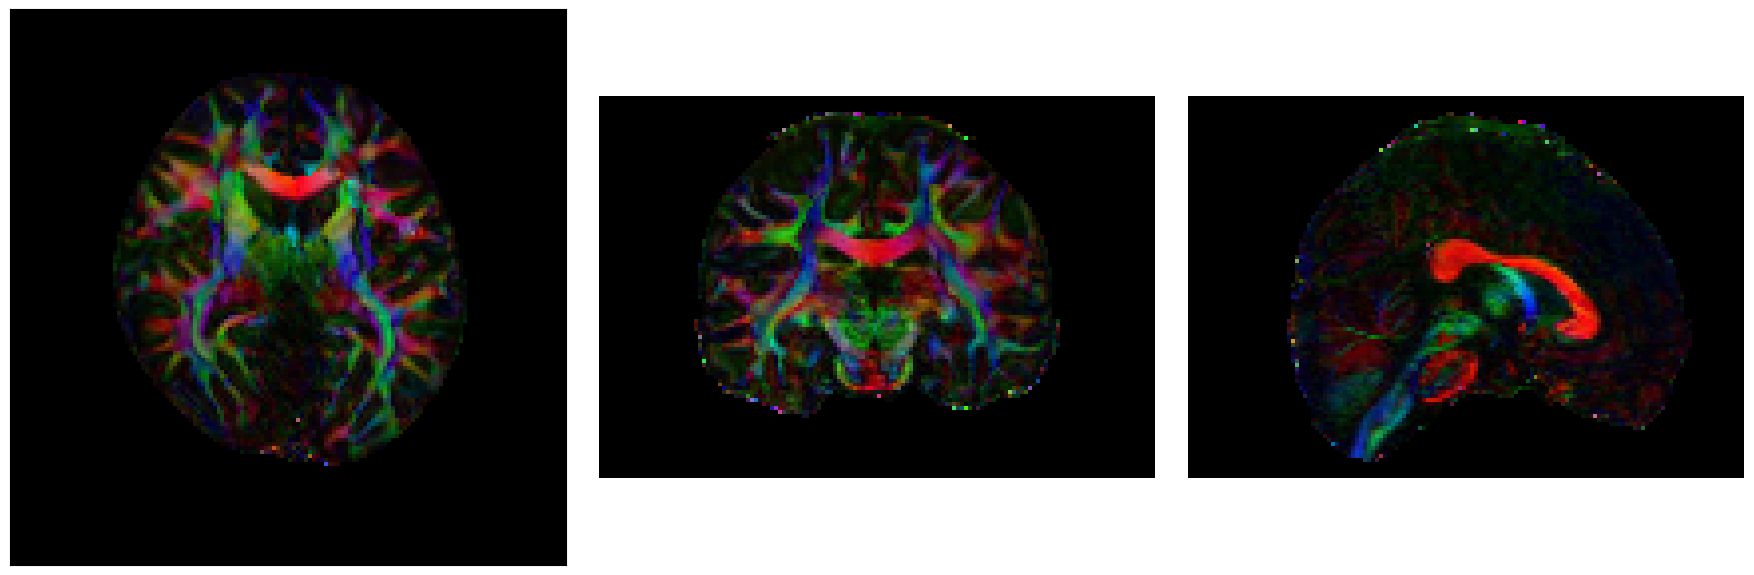

In [ ]:
dims = rgb_map.shape
plt.figure(figsize=(18,12))
plt.subplot(1, 3, 1)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.imshow(np.rot90(rgb_map[:, :, dims[2]//2, :]), cmap='gray', origin='lower')
plt.subplot(1, 3, 2).set_axis_off()
plt.imshow(np.rot90(rgb_map[:, dims[1]//2, :, :], k=3), cmap='gray', origin='lower')
plt.subplot(1, 3, 3).set_axis_off()
plt.imshow(np.rot90(rgb_map[dims[0]//2, :, :, :], k=3), cmap='gray', origin='lower')
plt.tight_layout()
plt.savefig("rgb_map.png")

In [ ]:
path_list = [test_data+'/DCLs/case_03',
              test_data+'/DCLs/case_07',
              test_data+'/DCLs/case_11',
              test_data+'/DESN/case_01',
              test_data+'/DESN/case_02',
              test_data+'/DESN/case_03',
              test_data+'/DESN/case_04',
              test_data+'/DESN/case_05',
              test_data+'/DESN/case_07',
              test_data+'/DESN/case_08',
              test_data+'/DESN/case_09',
              test_data+'/DESN/case_10',
              test_data+'/DESN/case_11',
              test_data+'/DESN/case_12',
              test_data+'/DESN/case_13',
              test_data+'/DESN/case_14',
              test_data+'/DESN/case_15',
              test_data+'/DESN/case_16',
              test_data+'/DESN/case_17',
              test_data+'/DESN/case_18',
             ]

In [6]:
# get cases list
path_list = glob.glob(os.path.join(main_dir,'case_*'))
#for each case extract optimum directions
for path in path_list:
    # print case
    print("Processing ", os.path.basename(path))
    #output path
    output = os.path.join(path,'dti')
    #target path
    target = os.path.join(path,'output')
    #target = os.path.join(path,'dti')

    # read difussion data
    fa, affine = load_nifti(os.path.join(target,'DTI_FA.nii.gz'))
    v1, _ = load_nifti(os.path.join(output,'DTI_V1.nii.gz'))
    v2, _ = load_nifti(os.path.join(output,'DTI_V2.nii.gz'))
    v3, _ = load_nifti(os.path.join(output,'DTI_V3.nii.gz'))
    # reconstruct eigen vectors from
    v1_e = np.expand_dims(v1,-1)
    v2_e = np.expand_dims(v2,-1)
    v3_e = np.expand_dims(v3,-1)
    eigvecs = np.concatenate((v1_e,v2_e,v3_e), axis=-1)

    # generate rgb map
    rgb_map = color_fa(fa, eigvecs)

    # save file
    save_nifti(os.path.join(target,'DTI_RGB.nii.gz'), rgb_map, affine)

Processing  case_47
Processing  case_25
Processing  case_56
Processing  case_72
Processing  case_21
Processing  case_63
Processing  case_44
Processing  case_14
Processing  case_01
Processing  case_59
Processing  case_76
Processing  case_52
Processing  case_68
Processing  case_07
Processing  case_58
Processing  case_23
Processing  case_65
Processing  case_55
Processing  case_06
Processing  case_75
Processing  case_71
Processing  case_50
Processing  case_78
Processing  case_43
Processing  case_70
Processing  case_73
Processing  case_27
Processing  case_46
Processing  case_09
Processing  case_66
Processing  case_35
Processing  case_19
Processing  case_39
Processing  case_33
Processing  case_15
Processing  case_13
Processing  case_36
Processing  case_26
Processing  case_51
Processing  case_69
Processing  case_03
Processing  case_67
Processing  case_54
Processing  case_48
Processing  case_45
Processing  case_41
Processing  case_74
Processing  case_38
Processing  case_22
Processing  case_34
